In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

x.shape

(2000, 20)

In [2]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [4]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_train_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9838944444444444


In [5]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(x_train,y_train)
y_train_pred = log_classifier.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = log_classifier.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc: 0.9863589331232614
RF test roc-auc: 0.9885777777777777


In [6]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train,y_train)
y_train_pred = ada_classifier.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = ada_classifier.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RF train roc-auc: 0.9975081174960356
RF test roc-auc: 0.9826111111111111


In [7]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_train_pred = knn_classifier.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = knn_classifier.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc: 0.981670071491109
RF test roc-auc: 0.9426111111111111


c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\L

In [8]:
pred = [] 
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851111111111112


In [9]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991873,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.93,0.966763,0.538202,0.8
3,0.92,0.761896,0.509875,0.8
4,0.54,0.779209,0.490344,0.4
...,...,...,...,...
595,0.02,0.024263,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,1.00,0.984400,0.532403,1.0
598,0.02,0.001157,0.441720,0.2


In [10]:
final_prediction

0      0.882765
1      0.115823
2      0.808741
3      0.747943
4      0.552388
         ...   
595    0.126346
596    0.112845
597    0.879201
598    0.165719
599    0.837358
Length: 600, dtype: float64

In [11]:
# ROC curve 

fpr, tpr, thresholds = roc_curve(y_test,final_prediction)
thresholds

array([       inf, 0.9134408 , 0.91123186, 0.91077496, 0.79195951,
       0.79056746, 0.7837751 , 0.78159566, 0.77347264, 0.77327862,
       0.75801086, 0.75786546, 0.7337345 , 0.73133029, 0.70496152,
       0.70389901, 0.66606159, 0.66243002, 0.61020014, 0.60170593,
       0.59907771, 0.58797279, 0.58392151, 0.58391408, 0.57303419,
       0.55653224, 0.53891934, 0.53724303, 0.53354489, 0.46040076,
       0.45645507, 0.45480611, 0.44199699, 0.39157193, 0.3863691 ,
       0.35141699, 0.34835998, 0.24076593, 0.23647529, 0.22714233,
       0.22627731, 0.20995213, 0.20851676, 0.12040982, 0.12033511,
       0.10498954])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by = 'accuracy',ascending=False,inplace = True)
accuracy_ls.head()

,thresholds,accuracy
31,0.454806,0.958333
27,0.537243,0.958333
32,0.441997,0.958333
28,0.533545,0.956667
30,0.456455,0.956667


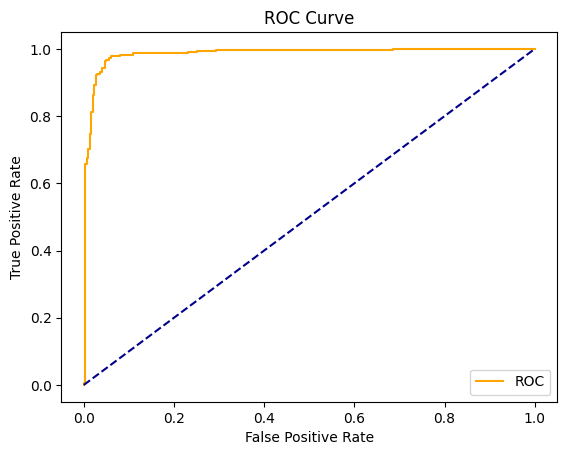

In [13]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)